In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [ ]:
# パウリ行列の定義
X = np.array([[0, 1], [1, 0]], dtype=complex)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)
I = np.identity(2, dtype=complex)


def heisenberg_hamiltonian(n):
    # ハミルトニアンを初期化
    dim = 2**n
    H = np.zeros((dim, dim), dtype=complex)
    for i in range(n - 1):
        # X_i X_{i+1} の項
        ops = [I] * n
        ops[i] = X
        ops[i + 1] = X
        O = ops[0]
        for op in ops[1:]:
            O = np.kron(O, op)
        H += O

        # Y_i Y_{i+1} の項
        ops[i] = Y
        ops[i + 1] = Y
        O = ops[0]
        for op in ops[1:]:
            O = np.kron(O, op)
        H += O

        # Z_i Z_{i+1} の項
        ops[i] = Z
        ops[i + 1] = Z
        O = ops[0]
        for op in ops[1:]:
            O = np.kron(O, op)
        H += O

    return H

In [ ]:
n_qubits = 2
H = heisenberg_hamiltonian(n_qubits)

print(H)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  2.+0.j  0.+0.j]
 [ 0.+0.j  2.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]


In [13]:
matrix_norms = []
min_eigvals = []
max_eigvals = []
n_qubits_max = 10

for n_qubits in range(2, n_qubits_max + 1):
    H = heisenberg_hamiltonian(n_qubits)
    min_eigvals.append(np.min(np.linalg.eigvals(H)))
    max_eigvals.append(np.max(np.linalg.eigvals(H)))
    matrix_norms.append(np.linalg.norm(H, ord=2))

In [14]:
print(f"min_eigvals: {min_eigvals}")
print(f"max_eigvals: {max_eigvals}")
print(f"matrix_norms: {matrix_norms}")

min_eigvals: [(-3.0000000000000004+0j), (-4+0j), (-6.464101615137761+0j), (-7.711545013271977+0j), (-9.974308535551714+0j), (-11.344958722746632+2.2754187231013776e-27j), (-13.49973039475159+8.135134454477928e-31j), (-14.945286825517368-1.577759436177477e-30j), (-17.032140829131688-7.681714920794226e-31j)]
max_eigvals: [(1.0000000000000002+0j), (2+0j), (3.0000000000000036+0j), (4.000000000000013+0j), (5.000000000000022+0j), (6.000000000000053+1.032875739068182e-15j), (7.000000000000062+8.673691826139165e-18j), (8.000000000000059+2.609024107869118e-15j), (9.000000000000176-8.4398223426200115e-16j)]
matrix_norms: [2.9999999999999996, 4.0, 6.464101615137754, 7.711545013271982, 9.974308535551705, 11.344958722746611, 13.499730394751564, 14.945286825517254, 17.032140829131535]


/Users/yutotakaki/Desktop/fourier_learning_ibm/.venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


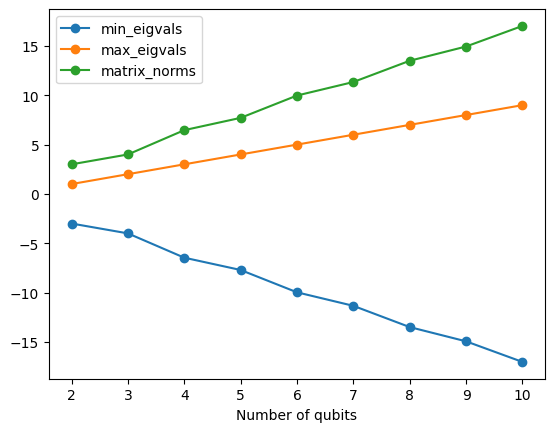

In [ ]:
# Plot
plt.plot(range(2, n_qubits_max + 1), min_eigvals, marker="o", label="min_eigvals")
plt.plot(range(2, n_qubits_max + 1), max_eigvals, marker="o", label="max_eigvals")
plt.plot(range(2, n_qubits_max + 1), matrix_norms, marker="o", label="matrix_norms")
plt.xlabel("Number of qubits")
plt.legend()